# tools for pre-processing images

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import matplotlib.pyplot as plt
import numpy as np
import os, sys

%matplotlib widget

In [2]:
__author__ = 'Pascal Louis <plouis35@gmail.com>'
__version__ = '0.1 alpha'
__keywords__ = ['astronomy', 'astropy', 'ccdproc', 'matplotlib']


In [3]:
from combiner import Images


In [30]:
def show_image(img):
    #img = lights_c[1]
    #p2, p98 = np.percentile(img, (2, 98))
    #l_rescale = sk.exposure.rescale_intensity(img, in_range=(p2, p98))
    #plt.imshow(l_rescale / np.max(l_rescale), cmap="gray")
    colormap = plt.cm.inferno
    cuts = (5, 98.0)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plt.tight_layout()
    im = ax.imshow(img, origin='lower', aspect='auto', cmap=colormap)
    cb = plt.colorbar(im)
    im.set_clim(np.percentile(img, cuts))
    plt.show()


In [5]:
from logger_utils import logger, handler
handler.show_logs()
logger.setLevel('INFO')
handler.clear_logs()


Output(layout=Layout(border_bottom='1px solid grey', border_left='1px solid grey', border_right='1px solid gre…

In [6]:
CAPTURE_DIR=os.path.join('../../../CAPTURES/NY_Vir/')
BIAS_FILES = "offset-15c-Bin2-*.fits"
DARK_FILES = "darkBin2X-35C-30s-*.fits"
FLAT_FILES = "Flat_v-*.fits"
CALIB_FILES = ""
SCIENCE_FILES = "NY VIR8*.fits"
TRIM_REGION = None

In [7]:
CAPTURE_DIR=os.path.join('../../../CAPTURES/2023_RENNES_L3_TP/images_spectro/images_tp_spectro/')
BIAS_FILES = "offset-*.fit"
DARK_FILES = "noir-600-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-*.fit"
SCIENCE_FILES = "agdra-*.fit"
TRIM_REGION = '600, 600, 2700, 1400'              # x1, y1, x2, y2 

In [16]:
CAPTURE_DIR=os.path.join('../../../CAPTURES/20231008_Void/')
BIAS_FILES = "Bias-0s-*.fit"
DARK_FILES = "Dark-300s-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-15s-*.fit"
SCIENCE_FILES = "deneb-200s-*.fit"
TRIM_REGION = None   

In [28]:
CAPTURE_DIR=os.path.join('../../../CAPTURES/20231007_Void/')
BIAS_FILES = "Bias-*.fit"
DARK_FILES = "Dark-300s-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-10s-*.fit"
SCIENCE_FILES = "10lac-300s-*.fit"
TRIM_REGION = None
TRIM_REGION = '0, 600, 1600, 700'  

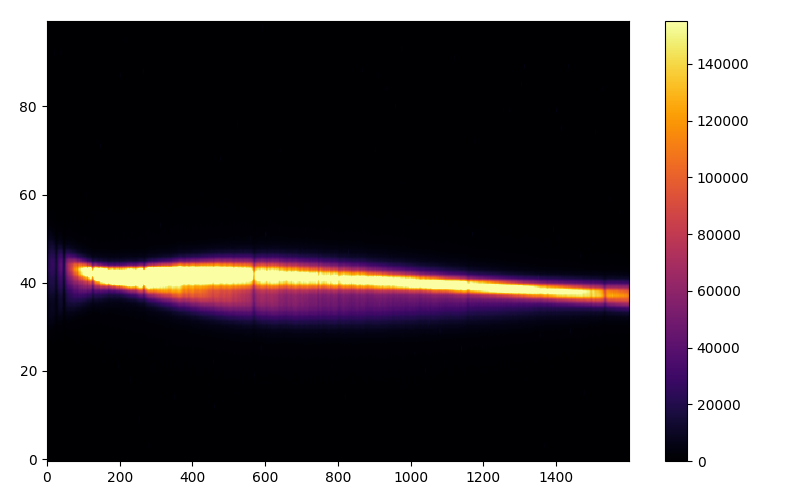

In [33]:
master_bias = Images.from_fit(glob.glob(os.path.join(CAPTURE_DIR, BIAS_FILES))).trim(TRIM_REGION).median()
master_dark = Images.from_fit(glob.glob(os.path.join(CAPTURE_DIR, DARK_FILES))).trim(TRIM_REGION).substract(master_bias).median()
master_flat = Images.from_fit(glob.glob(os.path.join(CAPTURE_DIR, FLAT_FILES))).trim(TRIM_REGION).substract(master_bias).median()
master_sciences = Images.from_fit(glob.glob(os.path.join(CAPTURE_DIR, SCIENCE_FILES))).trim(TRIM_REGION).substract(master_bias).substract(master_dark).divide(master_flat)
master_science = master_sciences.align_fft().sum()
#master_science = master_sciences.align().sum()

plt.close('all')
#show_image(master_bias)
#show_image(master_dark)
#show_image(master_flat)
#show_image(master_sciences[0])
show_image(master_science)
